In [37]:
import uproot
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
import hist

In [9]:
file = uproot.open("unweighted_events.root")
tree = file["LHEF"]
tree.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
Event                | int32_t                  | AsDtype('>i4')
Event/Event.fUniq... | uint32_t[]               | AsJagged(AsDtype('>u4'))
Event/Event.fBits    | uint32_t[]               | AsJagged(AsDtype('>u4'))
Event/Event.Number   | int64_t[]                | AsJagged(AsDtype('>i8'))
Event/Event.Npart... | int32_t[]                | AsJagged(AsDtype('>i4'))
Event/Event.Proce... | int32_t[]                | AsJagged(AsDtype('>i4'))
Event/Event.Weight   | double[]                 | AsJagged(AsDtype('>f8'))
Event/Event.ScalePDF | double[]                 | AsJagged(AsDtype('>f8'))
Event/Event.Coupl... | double[]                 | AsJagged(AsDtype('>f8'))
Event/Event.Coupl... | double[]                 | AsJagged(AsDtype('>f8'))
Event_size           | int32_t                  | AsDtype('>i4')
Rwgt                 | int32_t   

In [5]:
tree.keys()

['Event',
 'Event/Event.fUniqueID',
 'Event/Event.fBits',
 'Event/Event.Number',
 'Event/Event.Nparticles',
 'Event/Event.ProcessID',
 'Event/Event.Weight',
 'Event/Event.ScalePDF',
 'Event/Event.CouplingQED',
 'Event/Event.CouplingQCD',
 'Event_size',
 'Rwgt',
 'Rwgt/Rwgt.fUniqueID',
 'Rwgt/Rwgt.fBits',
 'Rwgt/Rwgt.Weight',
 'Rwgt_size',
 'Particle',
 'Particle/Particle.fUniqueID',
 'Particle/Particle.fBits',
 'Particle/Particle.PID',
 'Particle/Particle.Status',
 'Particle/Particle.Mother1',
 'Particle/Particle.Mother2',
 'Particle/Particle.ColorLine1',
 'Particle/Particle.ColorLine2',
 'Particle/Particle.Px',
 'Particle/Particle.Py',
 'Particle/Particle.Pz',
 'Particle/Particle.E',
 'Particle/Particle.M',
 'Particle/Particle.PT',
 'Particle/Particle.Eta',
 'Particle/Particle.Phi',
 'Particle/Particle.Rapidity',
 'Particle/Particle.LifeTime',
 'Particle/Particle.Spin',
 'Particle_size']

In [14]:
event_tree = tree["Event"]
rwt_tree = tree["Rwgt"]
particle_tree = tree["Particle"]

weights = rwt_tree["Rwgt.Weight"].array()
print("weights shape:", ak.num(weights), len(weights[0]))

pid = particle_tree["Particle.PID"].array()
pt  = particle_tree["Particle.PT"].array()
eta = particle_tree["Particle.Eta"].array()
phi = particle_tree["Particle.Phi"].array()
status = particle_tree["Particle.Status"].array()

px  = particle_tree["Particle.Px"].array()
py  = particle_tree["Particle.Py"].array()
pz  = particle_tree["Particle.Pz"].array()
E   = particle_tree["Particle.E"].array()
pt  = particle_tree["Particle.PT"].array()

print("Number of events:", len(pid))
print("Particles in first event:", len(pid[0]))

print("First event weights:", weights[0])
print("First event PIDs:", pid[0])
print("First event PTs:", pt[0])


weights shape: [19, 19, 19, 19, 19, 19, 19, 19, 19, ..., 19, 19, 19, 19, 19, 19, 19, 19, 19] 19
Number of events: 10000
Particles in first event: 8
First event weights: [0.239, 0.239, 0.239, 0.239, 0.239, ..., 0.239, 0.239, 0.239, 0.239, 0.239]
First event PIDs: [2, -2, 23, 23, -11, 11, 12, -12]
First event PTs: [0, 0, 48.5, 48.5, 17.9, 56.7, 12.9, 59]


In [46]:
#Leptons
final_status = (status == 1)
electrons = abs(pid) == 11
muons = abs(pid) == 13

leptons = final_status & (electrons | muons)

lep_px  = px[leptons]
lep_py  = py[leptons]
lep_pz  = pz[leptons]
lep_E   = E[leptons]
lep_pt  = pt[leptons]
lep_pid = pid[leptons]

#Neutrinos
neutrinos = final_status & ((abs(pid) == 12) | (abs(pid) == 14) | (abs(pid) == 16))

nu_px = px[neutrinos]
nu_py = py[neutrinos]
nu_pz = pz[neutrinos]
nu_E  = E[neutrinos]
nu_pt = pt[neutrinos]

#Two leptons results
n_lep = ak.num(lep_pt)
good_events = (n_lep == 2)

lep_px = lep_px[good_events]
lep_py = lep_py[good_events]
lep_pz = lep_pz[good_events]
lep_E  = lep_E[good_events]
lep_pt = lep_pt[good_events]
lep_pid = lep_pid[good_events]

nu_px = nu_px[good_events]
nu_py = nu_py[good_events]
nu_pt = nu_pt[good_events]
weights = weights[good_events]

#Leading lepton pT
leading_pt = ak.to_numpy(ak.max(lep_pt, axis=1))

#Z boson pT
Z_px = lep_px[:,0] + lep_px[:,1]
Z_py = lep_py[:,0] + lep_py[:,1]
Z_pt = np.sqrt(Z_px**2 + Z_py**2)

#MET
MET_px = ak.sum(nu_px, axis=1)
MET_py = ak.sum(nu_py, axis=1)
MET = np.sqrt(MET_px**2 + MET_py**2)

#Check
print("Events with two leptons:", len(Z_pt))
print("Leading lepton pT:", leading_pt[:5])
print("Z pT:", Z_pt[:5])
print("MET:", MET[:5])
print("Weights length:", len(weights))
print("This works, each event has 19 weights right?", ak.all(ak.num(weights) == 19))


Events with two leptons: 10000
Leading lepton pT: [ 56.66433016  61.18247825 126.83315461  47.92837242  35.19437174]
Z pT: [48.5, 44.3, 158, 30.5, 7.15]
MET: [48.5, 44.3, 158, 30.5, 7.15]
Weights length: 10000
This works, each event has 19 weights right? True


In [49]:
#Operators and their weights
operators = [
    ("cW",     1, 2),
    ("cHW",    3, 4),
    ("cHl3",   5, 6),
    ("cHq3",   7, 8),
    ("cll1",   9,10),
    ("cqq1",  11,12),
    ("cqq11", 13,14),
    ("cqq3",  15,16),
    ("cqq31", 17,18),
]

#Function for plotting
def build_hist(obs, weights, bins):
    hists = {}
    # SM histogram
    hists["SM"] = hist.Hist(hist.axis.Variable(bins), storage=hist.storage.Weight())
    hists["SM"].fill(obs, weight=weights[:,0])

    # EFT histograms
    for name, idx_p, idx_m in operators:
        h_p = hist.Hist(hist.axis.Variable(bins), storage=hist.storage.Weight())
        h_m = hist.Hist(hist.axis.Variable(bins), storage=hist.storage.Weight())

        h_p.fill(obs, weight=weights[:, idx_p])
        h_m.fill(obs, weight=weights[:, idx_m])

        hists[f"{name}+1"] = h_p
        hists[f"{name}-1"] = h_m

    return hists

In [75]:
def plot_histograms(hists, xlabel, save_name=None):

    sm = hists["SM"]

    # Prepare figure
    fig = plt.figure(figsize=(10,6))
    gs = fig.add_gridspec(2,1, height_ratios=[3,1], hspace=0.05)

    # Top panel: SM + EFT overlays
    ax = fig.add_subplot(gs[0])

    sm.plot(ax=ax, label="SM", color='black')

    for name, idx_p, idx_m in operators:
        h_p = hists[f"{name}+1"]
        h_m = hists[f"{name}-1"]

        h_p.plot(ax=ax, label=f"{name} +1", overlay=True)
        h_m.plot(ax=ax, label=f"{name} -1", linestyle='--', overlay=True)

    ax.set_ylabel("Events (weighted)")
    ax.set_title(xlabel + " — SM and EFT variations")
    ax.grid(True)
    ax.legend(ncol=2, fontsize=9)

    # Bottom panel: EFT/SM ratios
    ax2 = fig.add_subplot(gs[1], sharex=ax)

    sm_values = sm.values()
    bins = sm.axes[0].edges

    for name, idx_p, idx_m in operators:

        h_p = hists[f"{name}+1"]
        h_m = hists[f"{name}-1"]

        h_p_val = h_p.values()
        h_m_val = h_m.values()

        # SAFE division (NumPy arrays, no structured dtype)
        ratio_p = np.divide(h_p_val, sm_values, out=np.ones_like(h_p_val), where=sm_values != 0)
        ratio_m = np.divide(h_m_val, sm_values, out=np.ones_like(h_m_val), where=sm_values != 0)

        # Plot
        ax2.step(bins[:-1], ratio_p, label=f"{name} +1", where="mid")
        ax2.step(bins[:-1], ratio_m, label=f"{name} -1", linestyle='--', where="mid")

    ax2.axhline(1.0, color='black', linewidth=1)
    ax2.set_ylabel("EFT / SM")
    ax2.set_ylim(0.8, 1.2)
    ax2.grid(True)

    if save_name:
        plt.savefig(save_name, dpi=200)
        print(f"Saved plot: {save_name}")

    plt.show()


Saved plot: leading_pt.png


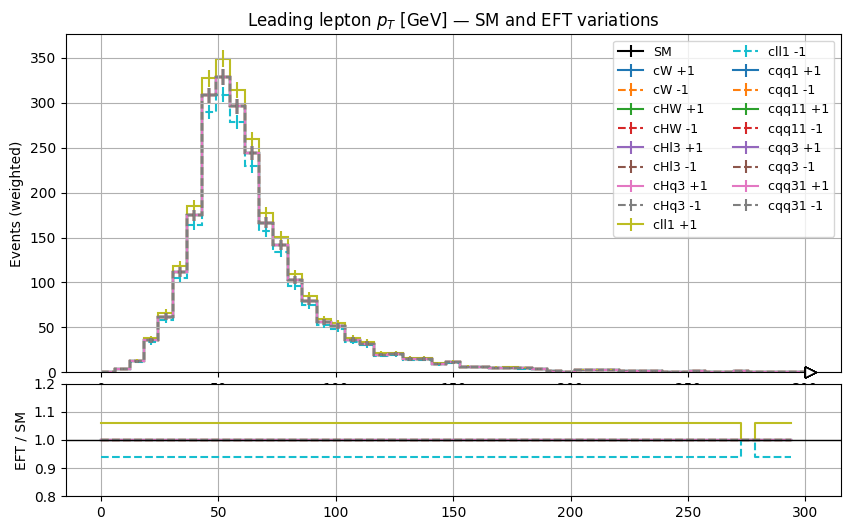

In [76]:
bins = np.linspace(0, 300, 50)
hists_ptlead = build_hist(leading_pt, weights, bins)
plot_histograms(hists_ptlead, "Leading lepton $p_T$ [GeV]", save_name="leading_pt.png")

Saved plot: Z_pt.png


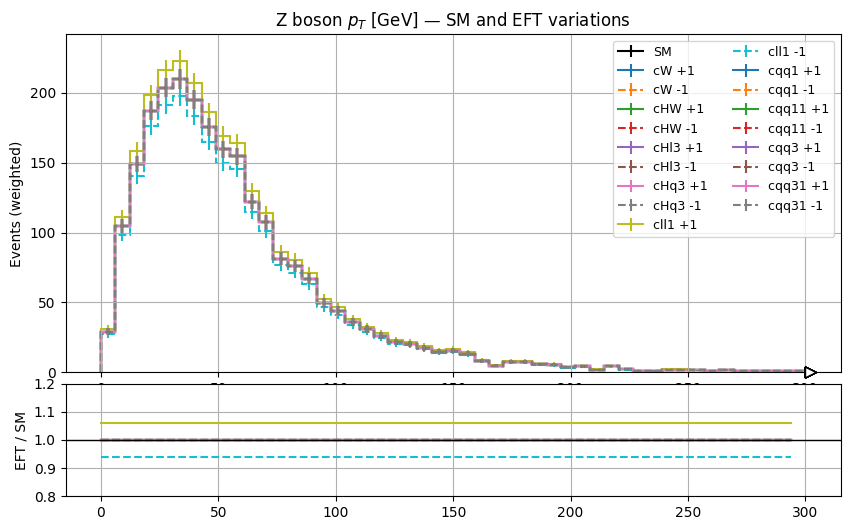

In [77]:
bins = np.linspace(0, 300, 50)
hists_Z = build_hist(Z_pt, weights, bins)
plot_histograms(hists_Z, "Z boson $p_T$ [GeV]", save_name="Z_pt.png")

Saved plot: MET.png


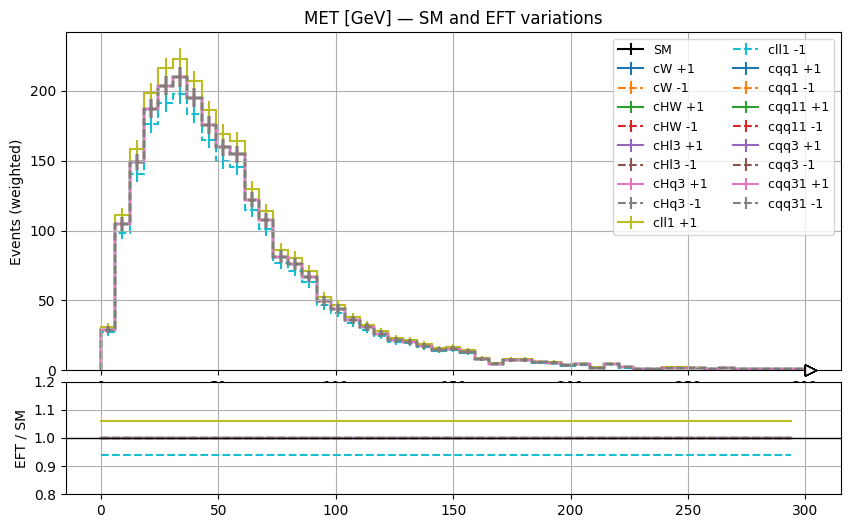

In [78]:
bins = np.linspace(0, 300, 50)
hists_MET = build_hist(MET, weights, bins)
plot_histograms(hists_MET, "MET [GeV]", save_name="MET.png")

In [83]:
unique_pid = list(set(ak.flatten(pid[neutrinos])))
print("Unique PIDs:", unique_pid)

unique_nu_counts = list(set(ak.num(nu_pt)))
print("Unique neutrino multiplicities:", unique_nu_counts)

print("Neutrino PIDs in first 10 events:", pid[neutrinos][:10])
print("Unique neutrino status codes:", list(set(ak.flatten(status[neutrinos]))))


Unique PIDs: [np.int32(12), np.int32(14), np.int32(16), np.int32(-16), np.int32(-14), np.int32(-12)]
Unique neutrino multiplicities: [np.int64(2)]
Neutrino PIDs in first 10 events: [[12, -12], [16, -16], [14, -14], [...], ..., [14, -14], [12, -12], [12, -12]]
Unique neutrino status codes: [np.int32(1)]


In [84]:
import awkward as ak

# Flatten and convert to Python list
flattened_pids = ak.flatten(pid[neutrinos]).to_list()
unique_pids = sorted(set(flattened_pids))
print("Unique PID values in neutrino selection:", unique_pids)

# Neutrino multiplicities
nu_counts = ak.num(nu_pt).to_list()
unique_nu_counts = sorted(set(nu_counts))
print("Unique neutrino multiplicities:", unique_nu_counts)

# First 10 events' neutrino PIDs
print("Neutrino PIDs in first 10 events:")
for i in range(10):
    print(pid[neutrinos][i].to_list())

# Unique neutrino status codes
flattened_status = ak.flatten(status[neutrinos]).to_list()
unique_status = sorted(set(flattened_status))
print("Unique neutrino status codes:", unique_status)


Unique PID values in neutrino selection: [-16, -14, -12, 12, 14, 16]
Unique neutrino multiplicities: [2]
Neutrino PIDs in first 10 events:
[12, -12]
[16, -16]
[14, -14]
[12, -12]
[16, -16]
[14, -14]
[16, -16]
[14, -14]
[12, -12]
[12, -12]
Unique neutrino status codes: [1]


In [85]:
import numpy as np

for name, idx_p, idx_m in operators:
    w_p = weights[:, idx_p]
    w_m = weights[:, idx_m]

    print(f"Operator {name}:")
    print(f"  +1 weights: mean={np.mean(w_p):.3f}, std={np.std(w_p):.3f}, min={np.min(w_p):.3f}, max={np.max(w_p):.3f}")
    print(f"  -1 weights: mean={np.mean(w_m):.3f}, std={np.std(w_m):.3f}, min={np.min(w_m):.3f}, max={np.max(w_m):.3f}")
    print()


Operator cW:
  +1 weights: mean=0.239, std=0.000, min=0.239, max=0.239
  -1 weights: mean=0.239, std=0.000, min=0.239, max=0.239

Operator cHW:
  +1 weights: mean=0.239, std=0.000, min=0.239, max=0.239
  -1 weights: mean=0.239, std=0.000, min=0.239, max=0.239

Operator cHl3:
  +1 weights: mean=0.239, std=0.000, min=0.239, max=0.239
  -1 weights: mean=0.239, std=0.000, min=0.239, max=0.239

Operator cHq3:
  +1 weights: mean=0.239, std=0.000, min=0.239, max=0.239
  +1 weights: mean=0.239, std=0.000, min=0.239, max=0.239
  -1 weights: mean=0.239, std=0.000, min=0.239, max=0.239

Operator cHW:
  +1 weights: mean=0.239, std=0.000, min=0.239, max=0.239
  -1 weights: mean=0.239, std=0.000, min=0.239, max=0.239

Operator cHl3:
  +1 weights: mean=0.239, std=0.000, min=0.239, max=0.239
  -1 weights: mean=0.239, std=0.000, min=0.239, max=0.239

Operator cHq3:
  +1 weights: mean=0.239, std=0.000, min=0.239, max=0.239
  -1 weights: mean=0.239, std=0.000, min=0.239, max=0.239

Operator cll1:
  +1 we

In [86]:
np.set_printoptions(precision=10)
print(weights[:5, :])

[[0.239, 0.239, 0.239, 0.239, 0.239, ..., 0.239, 0.239, 0.239, 0.239], ...]
